In [1]:
#getting necessary imports
import matplotlib.pyplot as plt
import cv2
import numpy as np

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
#Read the data
df = pd.read_csv(r"E:\GiantDataBases\A_Z Handwritten Data.csv").astype('float32')

df.shape

df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Split data into images/labels
X = df.drop('0',axis = 1)
y = df['0']

In [4]:
#splitting data into train and test
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

#reshaping training data to be displayed as an image
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [5]:
char_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

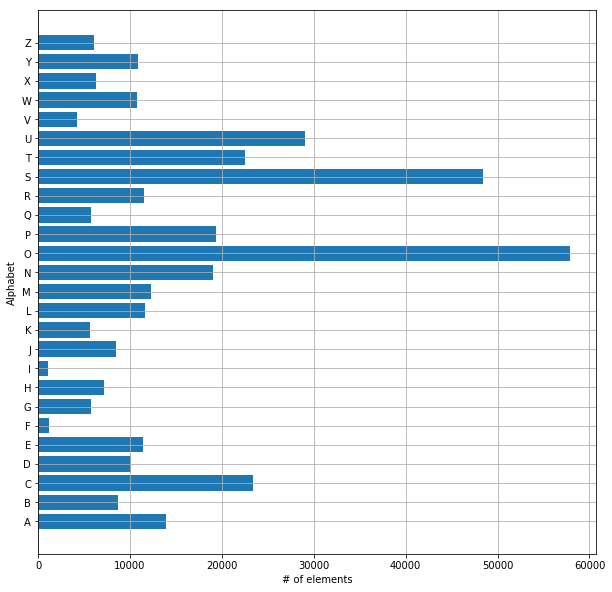

In [6]:
#Visualize the number of each letter
count = np.zeros(26, dtype = 'int')

for i in np.int0(y):
    count[i] +=1
    
alphabet = []

for i in char_dict.values():
    alphabet.append(i)
    
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.barh(alphabet, count)
plt.xlabel("# of elements")
plt.ylabel("Alphabet")

plt.grid()
plt.show()

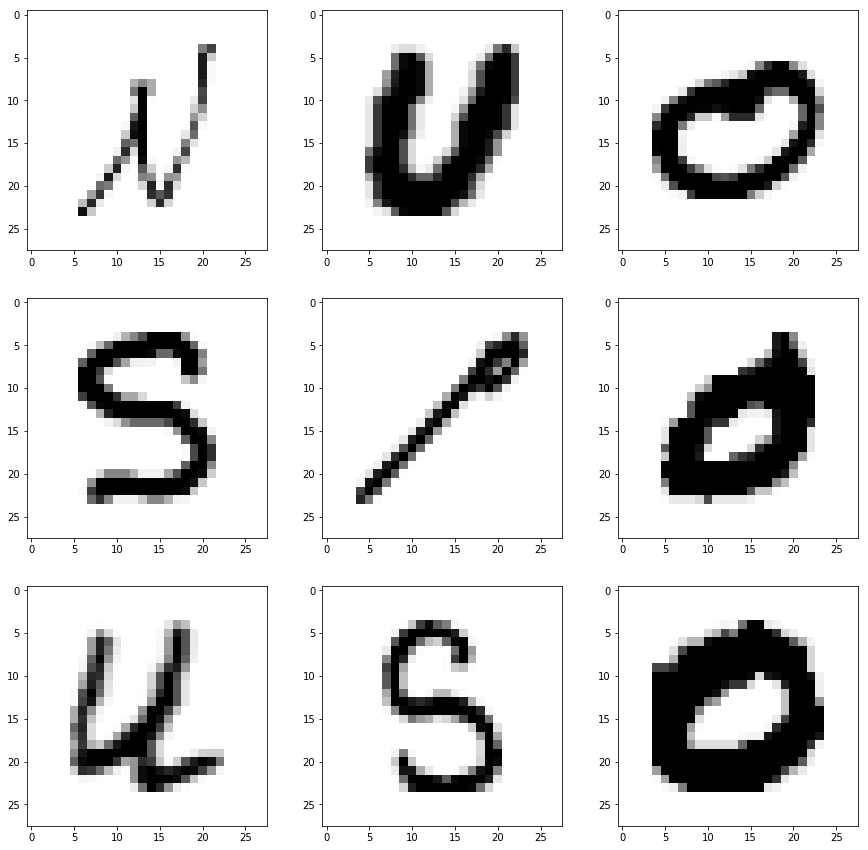

In [7]:
#Shuffle the Data
s = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (15,15))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(s[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(s[i], (28,28)), cmap="Greys")
    
plt.show()

In [8]:
#Reshaping the train/test X sets to be used in the model
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [9]:
#Convert train/test Y to categorical values
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [10]:
#Creating CNN Model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [11]:
#Compiling the model, definintg the optimizing and loss functions
#Optimize model used a combination of RMSprop & Adagram optimizing algorithms (Adam)

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))


9312/9312 [==============================] - 204s 22ms/step - loss: 0.1573 - accuracy: 0.9570 - val_loss: 0.0755 - val_accuracy: 0.9793


In [12]:
#Getting model summary
model.summary()
model.save('model_hand.h5')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [13]:
#Checking Accuracies and Losses

print("Validation Accuracy:", history.history['val_accuracy'])
print("Training Accuracy:", history.history['accuracy'])
print("Validation Loss:", history.history['val_loss'])
print("Training Loss:", history.history['loss'])

Validation Accuracy: [0.9792858362197876]
Training Accuracy: [0.957027792930603]
Validation Loss: [0.07546056807041168]
Training Loss: [0.15733647346496582]


In [14]:
#Trying a sample image
img = cv2.imread('Your path here!',0)
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
#img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_copy, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

img_pred = char_dict[np.argmax(model.predict(img_final))]

print(img_pred)

M


In [16]:
import pickle
with open('model_cnn.pkl', 'wb') as file:
      pickle.dump(model, file)

TypeError: can't pickle _thread.RLock objects